# Project 3: Fake News Detection

#### Bảng phân công công việc: 

| MSSV     | Họ và tên       | Công việc    |
|----------|-----------------|-----------|
| 19120186  | Đỗ Lê Khánh Đăng | Tiền xử lí văn bản tiếng việt |
| 19120412  | Nguyễn Minh Tú | Khám phá dữ liệu |
| 19120462  | Lục Minh Bửu | Deploy mô hình |
| 19120467  | Ngô Hữu Đang | Mô hình hóa |

####  [Link web deploy](https://share.streamlit.io/lcminhbu/streamlitapp/main/main.py?fbclid=IwAR3ASP_CG4drd81d689vI2WuFblDtRXMDk-d9Pe3Glogc4MXWQ7mlwSZru0)

## Cài đặt thêm thư viện liên quan

In [1]:
# !pip install underthesea

## Thêm các thư viện liên quan

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from underthesea import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

## Cài đặt hiện thị DataFrame

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Đọc dữ liệu

- vn_news_223_tdlfr.csv là file chứa news cần xử lý  <br />
- vietnamese-stopwords.txt chứa các stop word cần xử lý

In [4]:
data_df = pd.read_csv('vn_news_223_tdlfr.csv', encoding = 'utf-8')
file = open('vietnamese-stopwords.txt','r', encoding = 'utf-8')
stopWords = file.read().split('\n')
file.close()

## Khám phá dữ liệu

### Xem các mẫu dữ liệu

In [5]:
data_df.sample(5)

,text,domain,label
46,"Cậu bé kinh hãi khi thấy chân lúc nhúc hàng triệu sinh vật bấu chặt, cúi xuống phát hiện sự thật bàng hoàng\nKinh ngạc cảnh tượng hàng triệu sinh vật bò nhung nhúc bấu chặt lấy chân.\nChristmas là một đảo nhỏ thuộc Úc, cách 2.600 km về Phía tây bắc thành phố Perth. Hòn đảo là quê hương của vô số các loài động – thực vật vô cùng phong phú và kỳ lạ. Nếu không chú ý, những du khách lần đầu tiên đến tham quan hòn đảo này thường gặp nhiều “phe” sởn gai ốc, khi ra vừa chỉ đứng im vài phút thôi, đã thấy dưới bàn chân mình rờn rợn, nhung nhúc vô cùng nhiều sinh vật kỳ lạ đang bò lên và bấu chặt lấy. Thậm chí, cả những con đường hay cả bờ biển nơi đây đều bị nhuộm một màu đỏ rực.\nHàng trăm triệu con cua bò lên bấu chặt lấy chân cậu bé.\nBờ biển nhuộm màu đỏ rực.\nCác sinh vật lạ nhung nhúc bò trên mỏm đá.\nSau quá trình tìm hiểu thông qua người dân địa phương, các du khách mới ngã ngửa khi biết rằng nguyên nhân của hiện tượng kỳ quái này chính là cuộc di cư thường năm của loài cua đỏ.\nCuộc di cư đặc biệt này thường diễn ra với quy mô lớn.\nVào mỗi mùa giao phối, loài cua đỏ đặc biệt này di cư với quy mô lớn, nó được ví như một cơn thủy triều đỏ khủng khiếp. Theo các nhà nghiên cứu, do điều kiện khí hậu mùa mưa giúp cho việc di chuyển thuận tiện và dễ dàng hơn nên khoảng thời gian di cư của loài cua đỏ này thường bắt đầu vào khoảng tháng 10 – 12.\nVào mùa mưa, hàng triệu con cua đỏ này lại di cư ra biển để bắt đầu mùa sinh sản mới.\nSố lượng đàn cua đỏ di chuyển trong mỗi lần di cư rất đông, nên chính quyền địa phương phải đặt các tấm biểu báo cấm đường dành cho các phương tiện và người đi bộ nhằm tránh làm tổn thương đến chúng.\nChính quyền địa phương phải đặt các tấm biểu báo cấm đường dành cho các phương tiện và người đi bộ nhằm tránh làm tổn thương đến chúng.\nXem thêm: Muốn hờn cả thế giới khi chứng kiến sự thật trắng trợn đằng sau những bức ảnh sống ảo trăm nghìn like như thế này\nTrong mỗi đợt di cư, những con cua này sẽ phải vượt qua một đoạn đường dài 8 km, bắt đầu từ các khu rừng ở đảo Christmas, Australia đến bờ biển Ấn Độ Dương, trong vòng 9 đến 18 ngày. Nhiều du khách thắc mắc tại sao loài vật bé nhỏ này lại có thể di chuyển xa như vậy? Đó là vì đến mùa sinh sản, cua tiết ra nhiều nội tiết tố hyperglycemic, giúp tăng lượng đường glucoza trong máu, đảm bảo cho việc cung cấp năng lượng trong thời gian dài.\nĐến mùa sinh sản, cua tiết ra nhiều nội tiết tố hyperglycemic, giúp tăng lượng đường glucoza trong máu, đảm bảo cho việc cung cấp năng lượng trong thời gian dài.\nĐược biết cua đỏ là loài giáp xác duy nhất có con đực cùng di cư với con cái, những con cua đực sẽ dẫn đầu làn sóng di cư đến tìm hang để ẩn nấp, sau đó là các con cua cái sẽ đến những hang này để giao phối với cua đực rồi bò ra biển để đẻ trứng.\nCua đỏ là loài giáp xác duy nhất có con đực cùng di cư với con cái.\nCác cuộc di cư thường niên của cua đỏ đã trở nên quen thuộc với người dân ở đây, nhưng lại là điều vô cùng lý thú và thu hút hàng nghìn khách du lịch tò mò ghé thăm.",tinvn.info,1
149,"'Xã hội đen' Hải Phòng xây hàng trăm nhà trái phép trên đất quốc phòng\nNhững ngôi nhà trái phép vẫn đang được xây dựng tại khu A mảnh đất 14,2 ha. Ảnh: Giang Chinh\nNgày 17/10, thượng tướng Lê Chiêm, Thứ trưởng Quốc phòng ký biên bản bàn giao khu đất rộng 14,2 ha tại phường Thành Tô và Tràng Cát (quận Hải An) cho UBND TP Hải Phòng quản lý, sử dụng. Khu đất này trước đây do Tổng công ty 319 quản lý, nhưng nay không còn sử dụng vào mục đích quốc phòng.\nNgay sau khi tiếp nhận, UBND TP Hải Phòng đã ban hành quyết định thu hồi khu đất, giao lại cho UBND quận Hải An thực hiện, đồng thời thành lập Ban chỉ đạo xử lý các vướng mắc.\nTheo ông Đào Văn Học (đại diện Tổng công ty 319), khu đất trên được chia làm hai phần: khu A rộng 5 ha và khu B rộng 9,2 ha. Trước đây, Bộ Quốc phòng giao đất cho Sư đoàn 363. Đơn vị này sau đó cấu kết với bên ngoài san lấp khu A, chia lô bán nền, xây nhà trái phép khiến 5 bị can liên quan bị khởi tố.\nĐến năm 2014, Tổng côn

### Xem thông tin

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    223 non-null    object
 1   domain  223 non-null    object
 2   label   223 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB


### Xem mô tả

In [7]:
data_df.describe().round(1)

,label
count,223.0
mean,0.4
std,0.5
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [8]:
num_rows=data_df.shape[0]
num_cols=data_df.shape[1]
print(num_rows)
print(num_cols)

223
3


Dữ liệu có 223 dòng và 3 cột

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng là thông tin của 1 tin tức và đường dẫn của trang web chứa tin tức đó. Có vẻ tất cả các dòng đều có ý nghĩa giống nhau.

### Dữ liệu có các dòng bị lặp không?

In [9]:
dup=data_df.index.duplicated().sum()
dup

0

### Mỗi cột có ý nghĩa gì? 

- text: nội dung của tin tức
- domain: đường dẫn đến trang web chứa tin tức
- label: nhãn phân biệt tin giả hay tin thật

### Dữ liệu có bị thiếu không?

In [10]:
data_df['text'].isnull().sum()

0

In [11]:
data_df['domain'].isnull().sum()

0

In [12]:
data_df['label'].isnull().sum()

0

Vậy là không có cột nào bị thiếu dữ liệu cả.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [13]:
data_df.dtypes

text      object
domain    object
label      int64
dtype: object

#### Cột có dtype là object nghĩa là sao?

- Trong Pandas, kiểu dữ liệu object thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu object có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu object chứa địa chỉ). 
- Nếu một cột trong dataframe có dtype là object thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau 
- Để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử. Ta muốn xem thử trong nội bộ mỗi cột này có các kiểu dữ liệu nào.

In [14]:
def open_object_dtype(s):
    dtypes = set()
    s=s.apply(type)
    dtypes.update(s.unique().tolist())
    return dtypes

In [15]:
open_object_dtype(data_df['text'])

{str}

In [16]:
open_object_dtype(data_df['domain'])

{str}

In [17]:
open_object_dtype(data_df['label'])

{int}

Nhìn chung kiểu dữ liệu của các cột có vẻ đúng, không cần phải chỉnh sửa gì thêm.

### Kiểm tra phân bố các class có chênh lệch không?

0    55.156951
1    44.843049
Name: label, dtype: float64

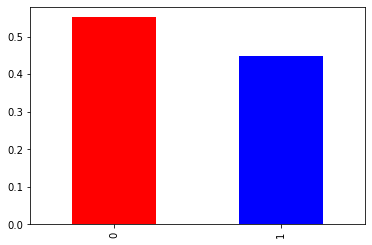

In [18]:
data_df.label.value_counts(normalize=True).plot(kind="bar", 
                                                color=["red", "blue"])
data_df['label'].value_counts(normalize=True) * 100

 Tỉ lệ giữa các lớp cũng khá cân bằng, không chênh lệch gì lắm.

### Các thông tin thống kê

#### Chiều dài trung bình mỗi record là bao nhiêu?

In [19]:
len_sum=0
for i in data_df['text']:
    len_sum+=len(i)
len_avg=len_sum/data_df['text'].count()
len_avg

2539.7713004484303

Chiều dài trung bình của mỗi record là 2548 ký tự.

### Record dài nhất là bao nhiêu?

In [20]:
max_len=0
for i in data_df['text']:
    if len(i)>max_len:
        max_len=len(i)
max_len

10019

Record dài nhất chứa 10084 ký tự.

### Record ngắn nhất là bao nhiêu?

In [21]:
min_len=len(data_df['text'][0])
for i in data_df['text']:
    if len(i)<min_len:
        min_len=len(i)
min_len

309

Record ngắn nhất chứa 311 ký tự.

### Tin tức được thu thập từ trang web nào nhiều nhất?

In [22]:
data_df['domain'].value_counts()

vnexpress.net              73
tinvn.info                 68
dantri.com.vn              14
thethao.tuoitre.vn         10
news.zing.vn                6
thoibao.today               6
tuoitre.vn                  5
tintucqpvn.net              5
thanhnien.vn                5
phapluat.news               3
kinhdoanh.vnexpress.net     3
doisong.vnexpress.net       2
giadinhtiepthi.com          2
thoibao.de                  2
giaitri.vnexpress.net       2
thegioitre.vn               2
www.ipick.vn                2
baonuocmy.com               1
suckhoe.vnexpress.net       1
haiduong.tintuc.vn          1
sorry.vn                    1
dulich.vnexpress.net        1
www.gioitreviet.net         1
sohoa.vnexpress.net         1
baoangiang.com.vn           1
autoxe.net                  1
binhluan.biz                1
laodong.vn                  1
www.vietgiaitri.com/        1
https://news.zing.vn        1
Name: domain, dtype: int64

- Hai trang web được thu thập tin tức nhiều nhất là: vnexpress.net và tinvn.info.
- Những tin tức còn lại được thu thập rải rác ở nhiều trang web khác nhau

## Tiền xử lí văn bản tiếng việt

### Loại bỏ các đường link và các dấu câu,  lowercase 

In [23]:
def wordopt(text):
    text = text.lower()
    text = re.sub('https?:\/\/.*[\r\n]*', ' ', text)
    text = re.sub('[^\w\s]',' ',text) 
    text = re.sub('\n', ' ', text)
    return text

In [24]:
data_df["text"]=data_df["text"].apply(wordopt)

In [25]:
data_df.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### Tokenizer

In [26]:
def tokenize(sentence):
    return word_tokenize(sentence, format = 'word')

## Mô hình hóa

- Chuyển đoạn văn tiếng Việt về vector, sử dụng CountVectorizer của sklearn
- với các tham số là danh sách stopwords tiếng Việt 
- và tokenizer tách từ tiếng Việt

In [27]:
vectorizer = CountVectorizer(
    stop_words = stopWords,
    tokenizer = tokenize
)

Chia tập dữ liệu thành 2 tập
- Tập train: `75%`
- Tập test: `25%`

In [28]:
X = data_df["text"]
y = data_df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                   random_state=30)
Xv_train = vectorizer.fit_transform(X_train)
Xv_test = vectorizer.transform(X_test)

C:\ProgramData\Anaconda3\envs\min_ds-env\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a', 'bao', 'bất', 'bất ý', 'bập', 'chi', 'chí', 'chót', 'chưng', 'chẳng', 'chết', 'chừng', 'coi', 'câu', 'cóc', 'cạnh', 'cảm', 'cật', 'cắt', 'cực', 'da', 'giời', 'hiện', 'hầu', 'hẳn', 'khô', 'kì', 'kỳ', 'lí', 'lô', 'lý', 'lẽ', 'lị', 'mày', 'mòi', 'mấy', 'mẹ', 'ngõ', 'nhiên', 'nhược', 'nhỡ', 'nỗi', 'phương', 'sợ', 'sức', 'thiên địa', 'thành', 'thái', 'thảo', 'thảy', 'thử', 'thực', 'tiếp', 'tiệt', 'trời đất', 'tuốt', 'tuồn tuột', 'tuồng', 'tàn', 'tàn tán', 'tán', 'tề', 'tỏ', 'tức', 'vung', 'ví', 'vô', 'vạn', 'vả', 'vẻ', 'xuất', 'xảy', 'xửa', 'âu', 'ô', 'ôi', 'đi', 'đành', 'đánh', 'đáo', 'đùng', 'đạch', 'đại', 'ối'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [29]:
#save model vectorizer
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

### Decision Tree

In [30]:

DT = DecisionTreeClassifier()
DT.fit(Xv_train,y_train)


DecisionTreeClassifier()

In [31]:
pred_dt = DT.predict(Xv_test)
print(DT.score(Xv_test, y_test))
#save model Decision Tree
joblib.dump(DT, 'DT_model.joblib')

0.7321428571428571


['DT_model.joblib']

### Naive Bayes

In [32]:
NB = MultinomialNB()
NB.fit(Xv_train,y_train)


MultinomialNB()

In [33]:
pred_nb = DT.predict(Xv_test)
print(NB.score(Xv_test, y_test))
#save model Naive Bayes
joblib.dump(NB, 'NB_model.joblib')

0.9464285714285714


['NB_model.joblib']

#### Đánh giá mô hình

- Mô hình với Decesion Tree có độ chính xác khá thấp khoảng 70%
- Mô hình với Naive Bayes có độ chính xác cao khoảng 95%
